OBJECTIVE
The objective of this notebook is to perform a data analysis on COVID-19 dataset provided by World Health Organisations(WHO) to explore trends, insights and regional impacts.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load dataset
covid = pd.read_csv('WHO COVID-19 cases.csv')

DATA EXPLORATION

In [4]:
#Display basic information about the dataset
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58560 entries, 0 to 58559
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      58560 non-null  object 
 1   Country_code       58316 non-null  object 
 2   Country            58560 non-null  object 
 3   Continent          58560 non-null  object 
 4   WHO_region         54168 non-null  object 
 5   New_cases          39260 non-null  float64
 6   Cumulative_cases   58560 non-null  int64  
 7   New_deaths         25084 non-null  float64
 8   Cumulative_deaths  58560 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 4.0+ MB


In [5]:
covid.head()

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0


In [6]:
covid.sample()

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
27653,2021-07-25,JO,Jordan,Asia,EMRO,3372.0,763922,61.0,9948


In [7]:
covid.tail()

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
58555,2024-08-04,ZW,Zimbabwe,Africa,AFRO,1.0,266387,NaN,5740
58556,2024-08-11,ZW,Zimbabwe,Africa,AFRO,NaN,266387,NaN,5740
58557,2024-08-18,ZW,Zimbabwe,Africa,AFRO,NaN,266387,NaN,5740
58558,2024-08-25,ZW,Zimbabwe,Africa,AFRO,NaN,266387,NaN,5740
58559,2024-09-01,ZW,Zimbabwe,Africa,AFRO,NaN,266387,NaN,5740


This dataset contains 58560 rows and 9 columns

In [8]:
#dataset cleaning
#convert 'Date_reported' to datetime
covid['Date_reported'] =pd.to_datetime(covid['Date_reported'])

In [9]:
#check missing values
print ('check missing value:\n')
print (covid.isnull().sum())

check missing value:



Date_reported            0
Country_code           244
Country                  0
Continent                0
WHO_region            4392
New_cases            19300
Cumulative_cases         0
New_deaths           33476
Cumulative_deaths        0
dtype: int64


In [10]:
#replace missing values in'New_cases' and 'New_deaths' 
covid['New_cases'] = covid['New_cases'].fillna(0)
covid['New_deaths'] = covid['New_deaths'].fillna(0)
print(covid['New_cases'].fillna(0))
print(covid['New_deaths'].fillna(0))


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
58555    1.0
58556    0.0
58557    0.0
58558    0.0
58559    0.0
Name: New_cases, Length: 58560, dtype: float64
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
58555    0.0
58556    0.0
58557    0.0
58558    0.0
58559    0.0
Name: New_deaths, Length: 58560, dtype: float64


In [11]:
#replace missing values in 'Country_code and 'WHO_region'
covid['Country_code'] =covid['Country_code'].fillna('unknown')
covid['WHO_region'] =covid['WHO_region'].fillna('unknown')
print(covid['Country_code'].fillna('unknown'))
print(covid['WHO_region'].fillna('unknown'))


0        AF
1        AF
2        AF
3        AF
4        AF
         ..
58555    ZW
58556    ZW
58557    ZW
58558    ZW
58559    ZW
Name: Country_code, Length: 58560, dtype: object
0        EMRO
1        EMRO
2        EMRO
3        EMRO
4        EMRO
         ... 
58555    AFRO
58556    AFRO
58557    AFRO
58558    AFRO
58559    AFRO
Name: WHO_region, Length: 58560, dtype: object


In [12]:
#check for duplicated values
print(covid.duplicated().sum())

0


In [13]:
#verify the cleaning process
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58560 entries, 0 to 58559
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      58560 non-null  datetime64[ns]
 1   Country_code       58560 non-null  object        
 2   Country            58560 non-null  object        
 3   Continent          58560 non-null  object        
 4   WHO_region         58560 non-null  object        
 5   New_cases          58560 non-null  float64       
 6   Cumulative_cases   58560 non-null  int64         
 7   New_deaths         58560 non-null  float64       
 8   Cumulative_deaths  58560 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 4.0+ MB


In [14]:
covid.head()

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,Asia,EMRO,0.0,0,0.0,0
1,2020-01-12,AF,Afghanistan,Asia,EMRO,0.0,0,0.0,0
2,2020-01-19,AF,Afghanistan,Asia,EMRO,0.0,0,0.0,0
3,2020-01-26,AF,Afghanistan,Asia,EMRO,0.0,0,0.0,0
4,2020-02-02,AF,Afghanistan,Asia,EMRO,0.0,0,0.0,0


In [15]:
covid.sample()

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
50555,2020-11-29,SD,Sudan,Africa,EMRO,1623.0,17810,50.0,1249


In [16]:
covid.tail()

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
58555,2024-08-04,ZW,Zimbabwe,Africa,AFRO,1.0,266387,0.0,5740
58556,2024-08-11,ZW,Zimbabwe,Africa,AFRO,0.0,266387,0.0,5740
58557,2024-08-18,ZW,Zimbabwe,Africa,AFRO,0.0,266387,0.0,5740
58558,2024-08-25,ZW,Zimbabwe,Africa,AFRO,0.0,266387,0.0,5740
58559,2024-09-01,ZW,Zimbabwe,Africa,AFRO,0.0,266387,0.0,5740


In [17]:
#statistical summary of the dataset
covid.describe()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,58560,5.856000e+04,5.856000e+04,58560.000000,5.856000e+04
mean,2022-05-04 11:59:59.999999744,1.325372e+04,1.810312e+06,120.582821,2.012550e+04
min,2020-01-05 00:00:00,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00
25%,2021-03-05 06:00:00,0.000000e+00,4.402750e+03,0.000000,2.900000e+01
50%,2022-05-04 12:00:00,4.400000e+01,4.682750e+04,0.000000,5.845000e+02
75%,2023-07-03 18:00:00,1.201000e+03,5.351678e+05,12.000000,7.118000e+03
max,2024-09-01 00:00:00,4.047548e+07,1.034368e+08,47687.000000,1.197213e+06
std,NaN,2.212564e+05,7.851277e+06,805.691725,8.220948e+04


In [18]:
covid['WHO_region'].value_counts()

WHO_region
EURO       13420
AFRO       11468
AMRO       11468
WPRO        8296
EMRO        5368
unknown     4392
SEARO       2684
OTHER       1464
Name: count, dtype: int64

In [19]:
covid['Continent'].value_counts()

Continent
Africa           13908
Europe           11956
Asia             11712
North America    10248
Oceania           4636
South America     3172
Uncategorized     1464
island            1464
Name: count, dtype: int64

In [20]:
covid['Country'].value_counts()

Country
Afghanistan                     244
Albania                         244
Netherlands (Kingdom of the)    244
New Caledonia                   244
New Zealand                     244
                               ... 
Guadeloupe                      244
Guam                            244
Guatemala                       244
Guernsey                        244
Zimbabwe                        244
Name: count, Length: 240, dtype: int64

In [21]:
covid['New_cases'], covid['New_deaths'].value_counts()

(0        0.0
 1        0.0
 2        0.0
 3        0.0
 4        0.0
         ... 
 58555    1.0
 58556    0.0
 58557    0.0
 58558    0.0
 58559    0.0
 Name: New_cases, Length: 58560, dtype: float64,
 New_deaths
 0.0       33476
 1.0        3109
 2.0        1817
 3.0        1205
 4.0         851
           ...  
 1306.0        1
 2163.0        1
 1848.0        1
 1858.0        1
 656.0         1
 Name: count, Length: 2139, dtype: int64)

In [22]:
covid['Cumulative_cases'], covid['Cumulative_deaths'].value_counts()

(0             0
 1             0
 2             0
 3             0
 4             0
           ...  
 58555    266387
 58556    266387
 58557    266387
 58558    266387
 58559    266387
 Name: Cumulative_cases, Length: 58560, dtype: int64,
 Cumulative_deaths
 0         8695
 1          895
 2          554
 21         370
 12         341
           ... 
 3694         1
 3975         1
 4422         1
 4934         1
 141271       1
 Name: count, Length: 14289, dtype: int64)

In [23]:
#select columns (Country, Continent, WHO_region)
print (covid[['Country', 'Continent', 'WHO_region']])

           Country Continent WHO_region
0      Afghanistan      Asia       EMRO
1      Afghanistan      Asia       EMRO
2      Afghanistan      Asia       EMRO
3      Afghanistan      Asia       EMRO
4      Afghanistan      Asia       EMRO
...            ...       ...        ...
58555     Zimbabwe    Africa       AFRO
58556     Zimbabwe    Africa       AFRO
58557     Zimbabwe    Africa       AFRO
58558     Zimbabwe    Africa       AFRO
58559     Zimbabwe    Africa       AFRO

[58560 rows x 3 columns]


In [24]:
#finding the number of total new cases reported
covid.New_cases.sum()

776137815.0

In [25]:
#total new deaths reported
covid.New_deaths.sum()

7061330.0

In [26]:
#total cumulative cases reported
covid.Cumulative_cases.sum()

106011889320

In [27]:
#total Cumulative deaths reported
covid.Cumulative_deaths.sum()

1178549351

In [28]:
#sorting number of new cases higher than 30000
covid.New_cases>30000

0        False
1        False
2        False
3        False
4        False
         ...  
58555    False
58556    False
58557    False
58558    False
58559    False
Name: New_cases, Length: 58560, dtype: bool

In [29]:
#new deaths higher than 20000
covid.New_deaths>20000

0        False
1        False
2        False
3        False
4        False
         ...  
58555    False
58556    False
58557    False
58558    False
58559    False
Name: New_deaths, Length: 58560, dtype: bool

In [30]:
#number of cumulative cases higher than 100000
covid.Cumulative_cases>100000

0        False
1        False
2        False
3        False
4        False
         ...  
58555     True
58556     True
58557     True
58558     True
58559     True
Name: Cumulative_cases, Length: 58560, dtype: bool

In [31]:
#number of cumulative deaths higher than 50000
covid.Cumulative_cases>50000 

0        False
1        False
2        False
3        False
4        False
         ...  
58555     True
58556     True
58557     True
58558     True
58559     True
Name: Cumulative_cases, Length: 58560, dtype: bool

In [32]:
#top 5 countries with the high new cases
covid.sort_values('New_cases',ascending=False).head()

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
10403,2022-12-25,CN,China,Asia,WPRO,40475477.0,62445650,5849.0,38995
10404,2023-01-01,CN,China,Asia,WPRO,24644876.0,87090526,17893.0,56888
10402,2022-12-18,CN,China,Asia,WPRO,11098550.0,21970173,1708.0,33146
10405,2023-01-08,CN,China,Asia,WPRO,8061762.0,95152288,12991.0,69879
55982,2022-01-16,US,United States of America,North America,AMRO,5650933.0,64924728,14380.0,847829


In [33]:
#top 5 countries with the high new deaths
covid.sort_values('New_deaths',ascending=False).head()

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
10409,2023-02-05,CN,China,Asia,WPRO,192969.0,98637553,47687.0,117566
23496,2021-05-23,IN,India,Asia,SEARO,1846055.0,26530132,28982.0,299266
23495,2021-05-16,IN,India,Asia,SEARO,2387663.0,24684077,27922.0,270284
23494,2021-05-09,IN,India,Asia,SEARO,2738957.0,22296414,26820.0,242362
23497,2021-05-30,IN,India,Asia,SEARO,1364668.0,27894800,26706.0,325972


In [34]:
#top 5 countries with the high cumulative cases
covid.sort_values('Cumulative_cases',ascending=False).head()

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
56096,2024-03-24,US,United States of America,North America,AMRO,0.0,103436829,846.0,1184393
56061,2023-07-23,US,United States of America,North America,AMRO,0.0,103436829,540.0,1133267
56078,2023-11-19,US,United States of America,North America,AMRO,0.0,103436829,1431.0,1153504
56077,2023-11-12,US,United States of America,North America,AMRO,0.0,103436829,1392.0,1152073
56076,2023-11-05,US,United States of America,North America,AMRO,0.0,103436829,1247.0,1150681


In [35]:
#top 5 countries with the high cumulative cases
covid.sort_values('Cumulative_deaths', ascending=False).head()

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
56119,2024-09-01,US,United States of America,North America,AMRO,0.0,103436829,663.0,1197213
56118,2024-08-25,US,United States of America,North America,AMRO,0.0,103436829,907.0,1196550
56117,2024-08-18,US,United States of America,North America,AMRO,0.0,103436829,937.0,1195643
56116,2024-08-11,US,United States of America,North America,AMRO,0.0,103436829,973.0,1194706
56115,2024-08-04,US,United States of America,North America,AMRO,0.0,103436829,895.0,1193733


GLOBAL TRENDS

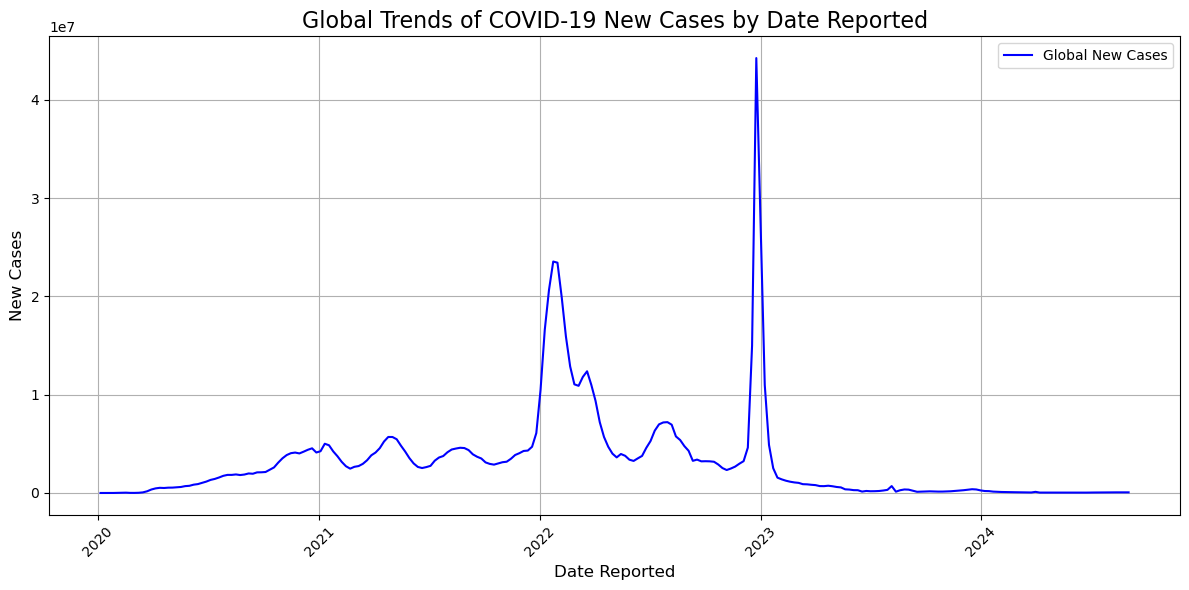

In [36]:


# Group data by date for global trends
global_trends = covid.groupby('Date_reported')['New_cases'].sum().reset_index()

# Plotting with Matplotlib and Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_trends, x='Date_reported', y='New_cases', color='blue', label='Global New Cases')
plt.title('Global Trends of COVID-19 New Cases by Date Reported', fontsize=16)
plt.xlabel('Date Reported', fontsize=12)
plt.ylabel('New Cases', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


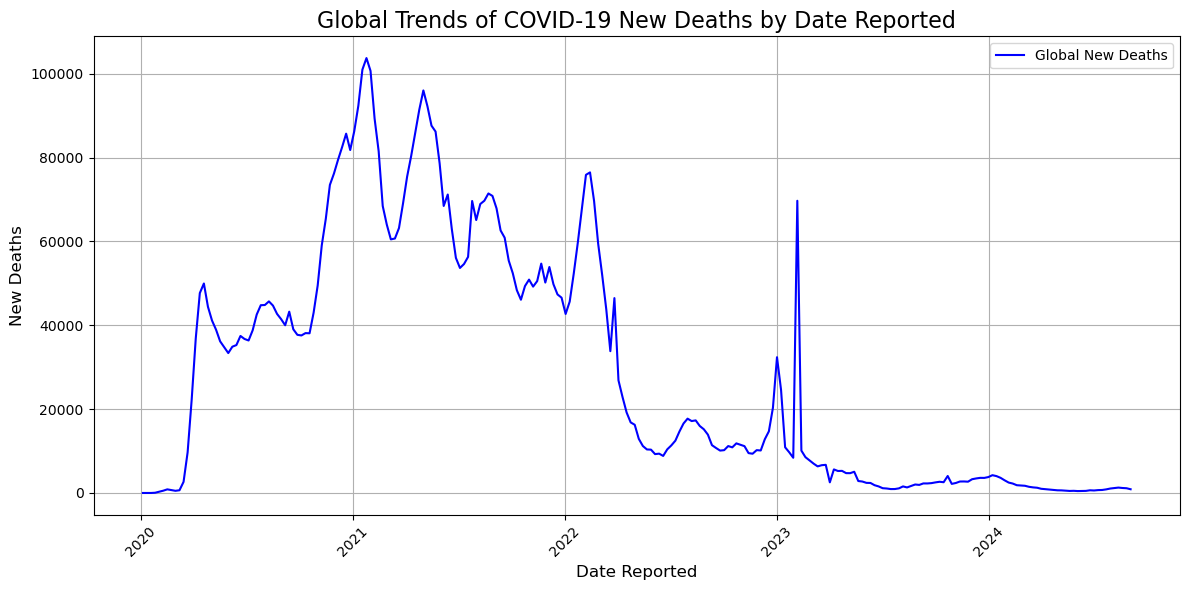

In [37]:
# Group data by date for global trends
global_trends = covid.groupby('Date_reported')['New_deaths'].sum().reset_index()

# Plotting with Matplotlib and Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_trends, x='Date_reported', y='New_deaths', color='blue', label='Global New Deaths')
plt.title('Global Trends of COVID-19 New Deaths by Date Reported', fontsize=16)
plt.xlabel('Date Reported', fontsize=12)
plt.ylabel('New Deaths', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


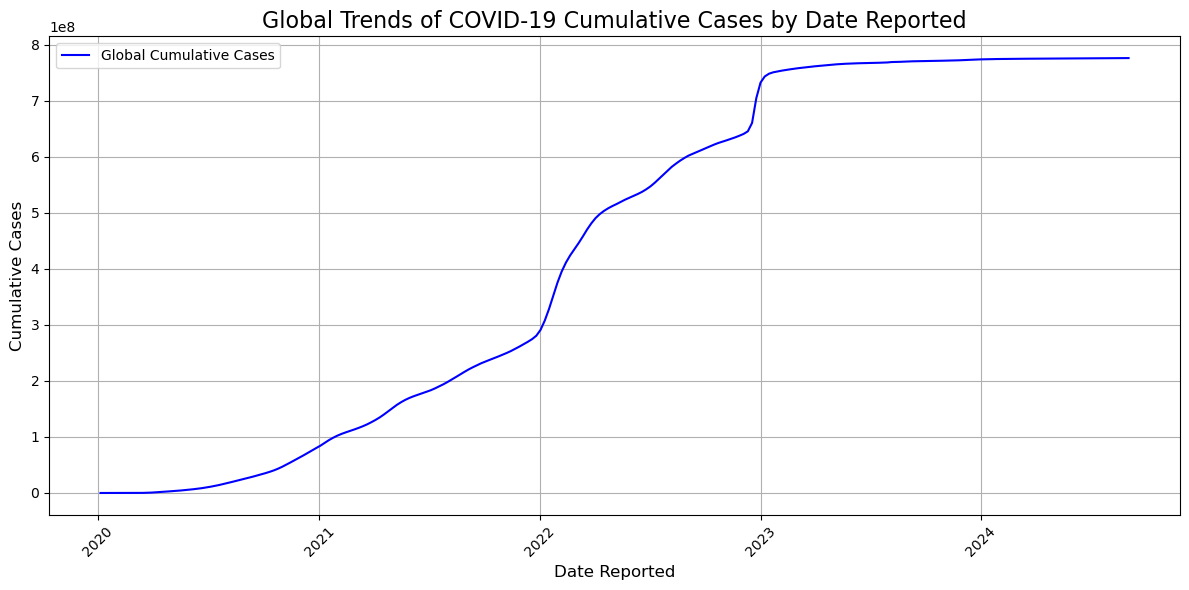

In [38]:
# Group data by date for global trends
global_trends = covid.groupby('Date_reported')['Cumulative_cases'].sum().reset_index()

# Plotting with Matplotlib and Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_trends, x='Date_reported', y='Cumulative_cases', color='blue', label='Global Cumulative Cases')
plt.title('Global Trends of COVID-19 Cumulative Cases by Date Reported', fontsize=16)
plt.xlabel('Date Reported', fontsize=12)
plt.ylabel('Cumulative Cases', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

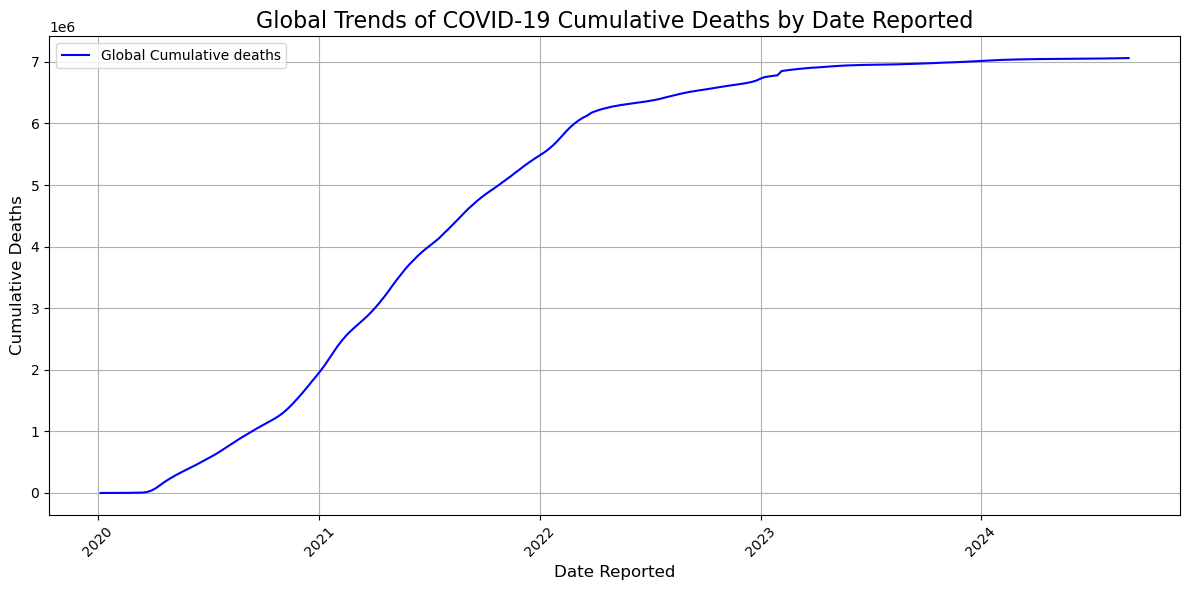

In [39]:
# Group data by date for global trends
global_trends = covid.groupby('Date_reported')['Cumulative_deaths'].sum().reset_index()

# Plotting with Matplotlib and Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_trends, x='Date_reported', y='Cumulative_deaths', color='blue', label='Global Cumulative deaths')
plt.title('Global Trends of COVID-19 Cumulative Deaths by Date Reported', fontsize=16)
plt.xlabel('Date Reported', fontsize=12)
plt.ylabel('Cumulative Deaths', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

REGIONAL ANALYSIS

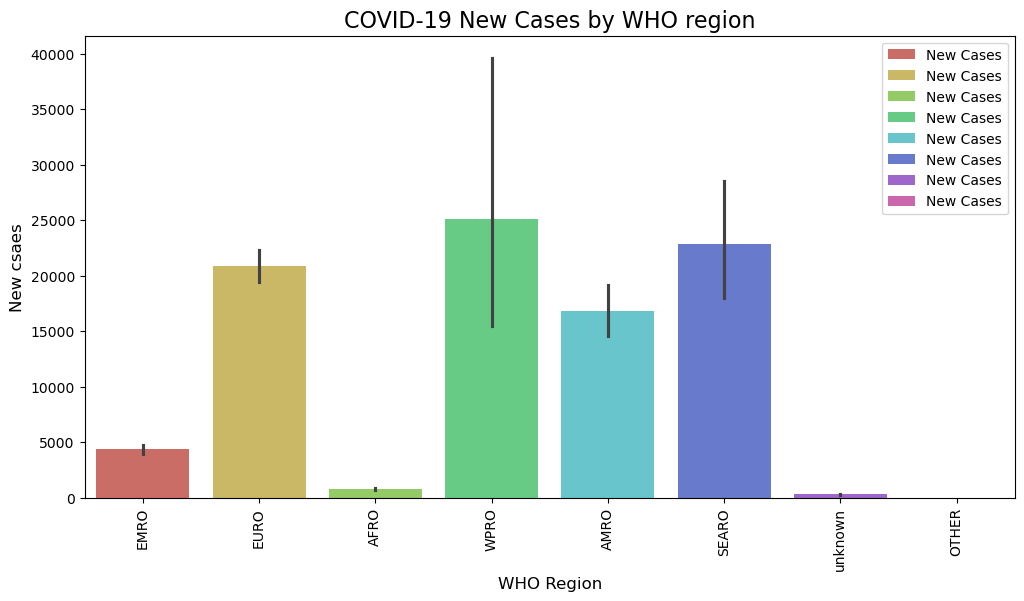

In [40]:
#comparison by who region for new cases
#plotting by who region for new cases
plt.figure(figsize=(12,6))
sns.barplot(data =covid, x ='WHO_region', y='New_cases', palette ='hls', hue ='WHO_region', label='New Cases')
plt.title('COVID-19 New Cases by WHO region', fontsize=16)
plt.xticks (rotation = 90)
plt.xlabel('WHO Region', fontsize=12)
plt.ylabel('New csaes', fontsize=12)
plt.legend()
plt.show()

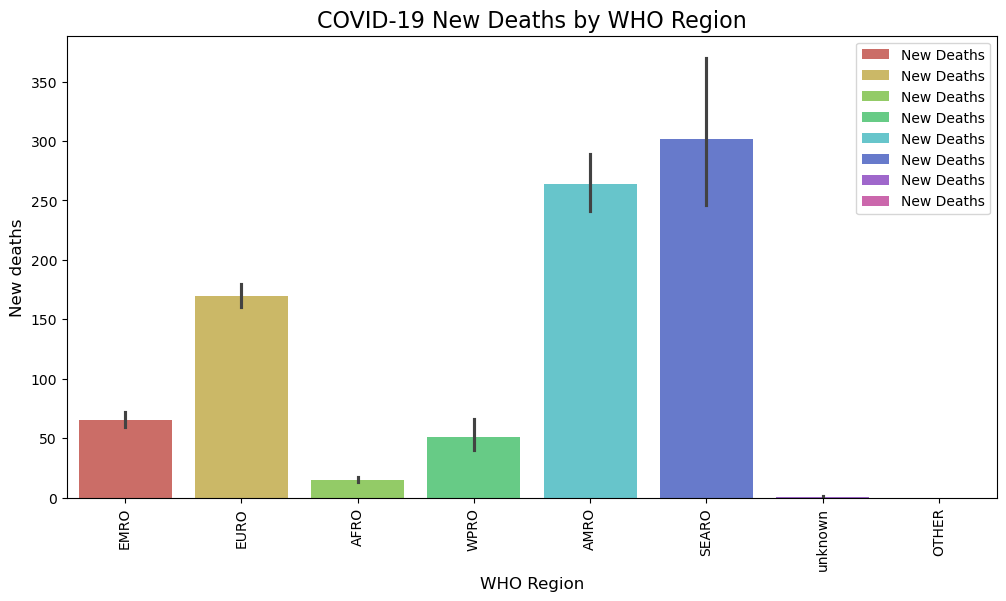

In [41]:
#comparison by who region for new deaths
#plotting by who region for new deaths
plt.figure(figsize=(12,6))
sns.barplot(data =covid, x ='WHO_region', y='New_deaths', palette ='hls', hue ='WHO_region', label='New Deaths')
plt.title('COVID-19 New Deaths by WHO Region', fontsize=16)
plt.xticks (rotation = 90)
plt.xlabel('WHO Region', fontsize=12)
plt.ylabel('New deaths', fontsize=12)
plt.legend()
plt.show()

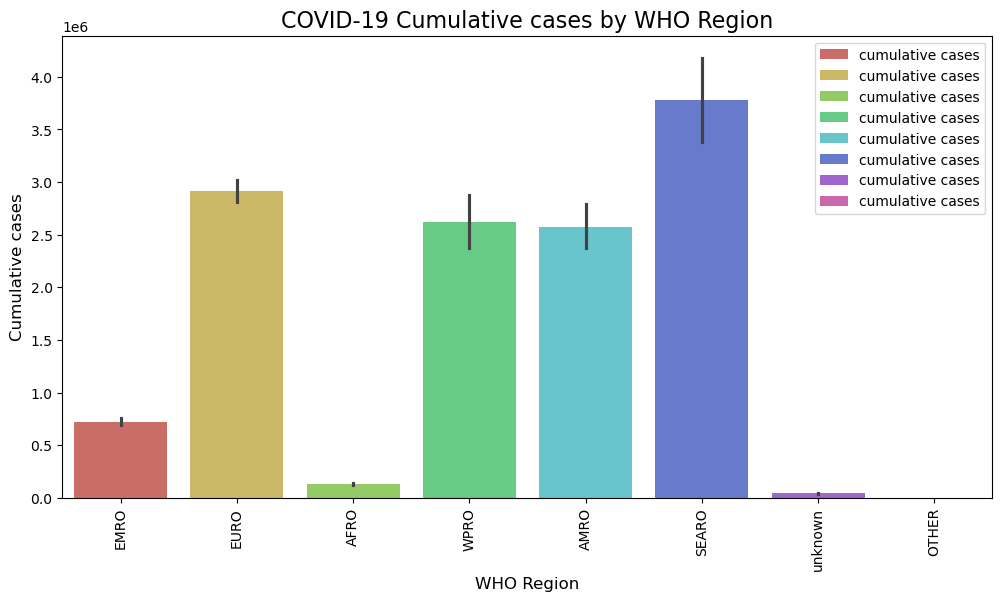

In [42]:

#comparison by who region for cumulative cases
#plotting by who region for cumulative cases
plt.figure(figsize=(12,6))
sns.barplot(data =covid, x ='WHO_region', y='Cumulative_cases', palette ='hls', hue ='WHO_region', label='cumulative cases')
plt.title('COVID-19 Cumulative cases by WHO Region', fontsize=16)
plt.xticks (rotation = 90)
plt.xlabel('WHO Region', fontsize=12)
plt.ylabel('Cumulative cases', fontsize=12)
plt.legend()
plt.show()


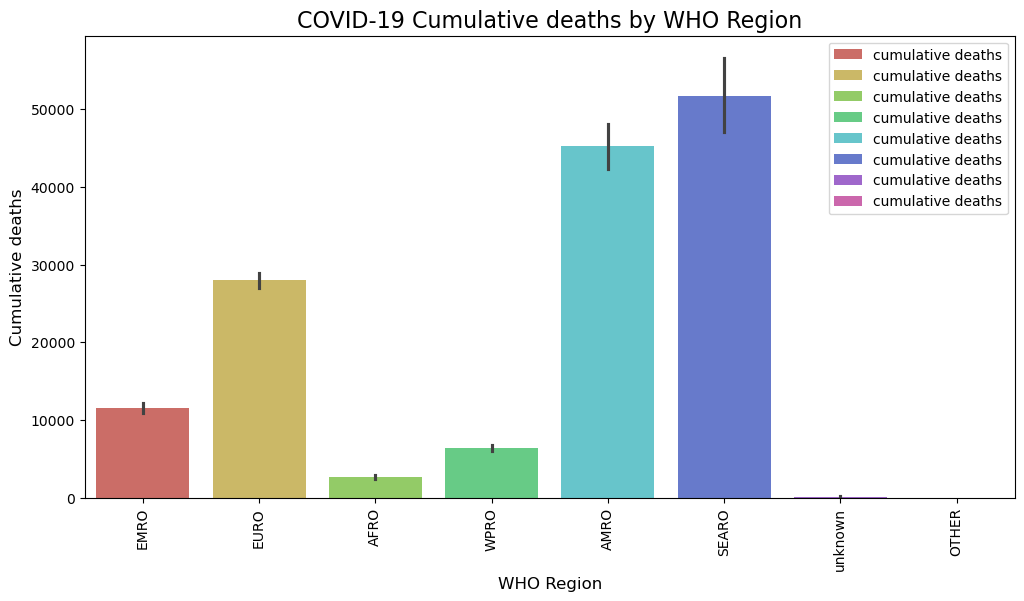

In [43]:

#comparison by who region for cumulative deaths
#plotting by who region for cumulative deaths
plt.figure(figsize=(12,6))
sns.barplot(data =covid, x ='WHO_region', y='Cumulative_deaths', palette ='hls', hue ='WHO_region', label='cumulative deaths')
plt.title('COVID-19 Cumulative deaths by WHO Region', fontsize=16)
plt.xticks (rotation = 90)
plt.xlabel('WHO Region', fontsize=12)
plt.ylabel('Cumulative deaths', fontsize=12)
plt.legend()
plt.show()


COUNTRY SPECIFIC TRENDS

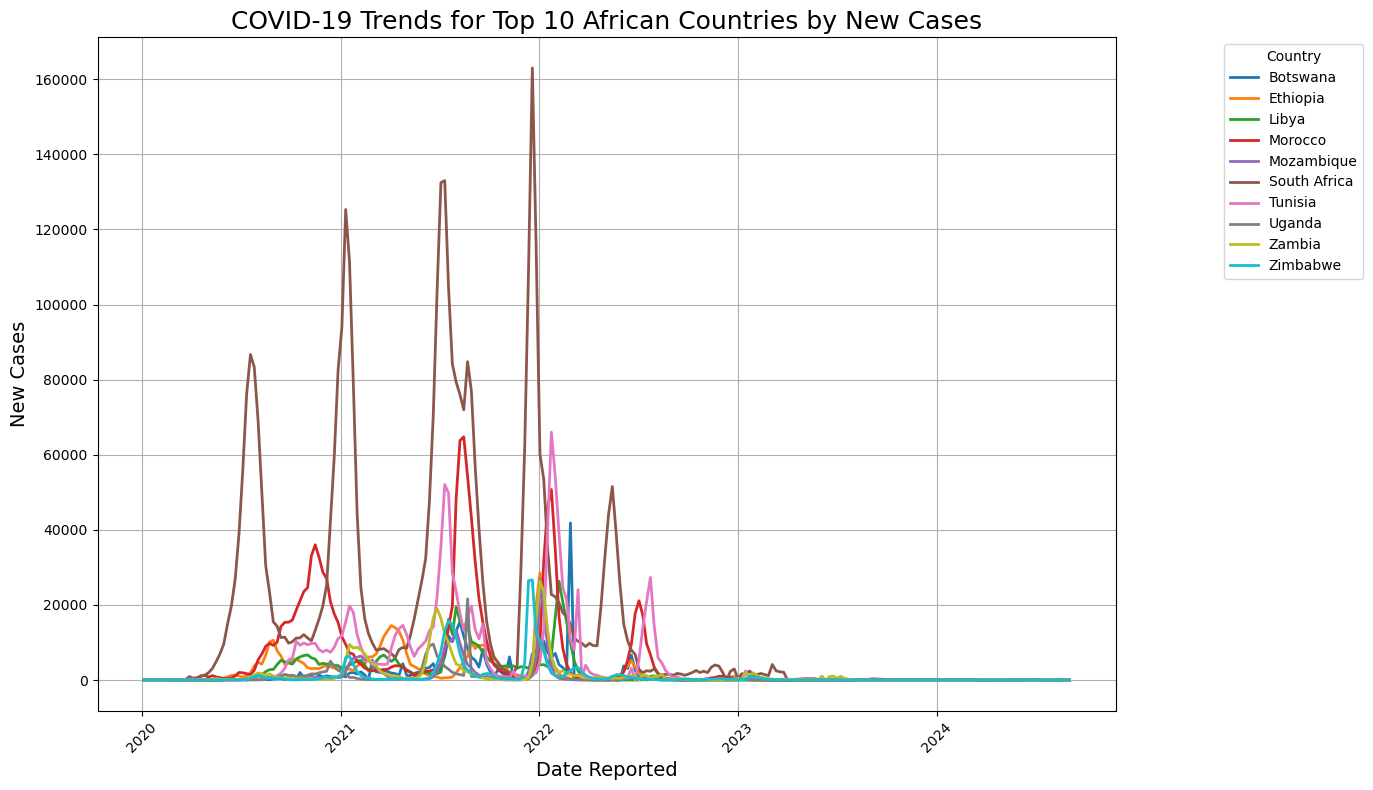

In [44]:


# Filter for African countries
africa_countries = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
    'Chad', 'Comoros', 'Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana',
    'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
    'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles',
    'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Togo', 'Tunisia', 'Uganda', 'United Republic of Tanzania',
    'Zambia', 'Zimbabwe'
]

africa_data = covid[covid['Country'].isin(africa_countries)]

# Calculate total cases for each country
total_cases = africa_data.groupby('Country')['New_cases'].max().reset_index()
top_10_countries = total_cases.nlargest(10, 'New_cases')['Country']

# Filter data for the top 10 countries
top_10_data = africa_data[africa_data['Country'].isin(top_10_countries)]

# Aggregate data by country and date
country_trends = top_10_data.groupby(['Date_reported', 'Country'])['New_cases'].sum().reset_index()

# Plotting top 10 African countries
plt.figure(figsize=(14, 8))
sns.lineplot(data=country_trends, x='Date_reported', y='New_cases', hue='Country', linewidth=2)

# Customize the plot
plt.title('COVID-19 Trends for Top 10 African Countries by New Cases', fontsize=18)
plt.xlabel('Date Reported', fontsize=14)
plt.ylabel('New Cases', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Country', fontsize=10)
plt.tight_layout()

plt.show()


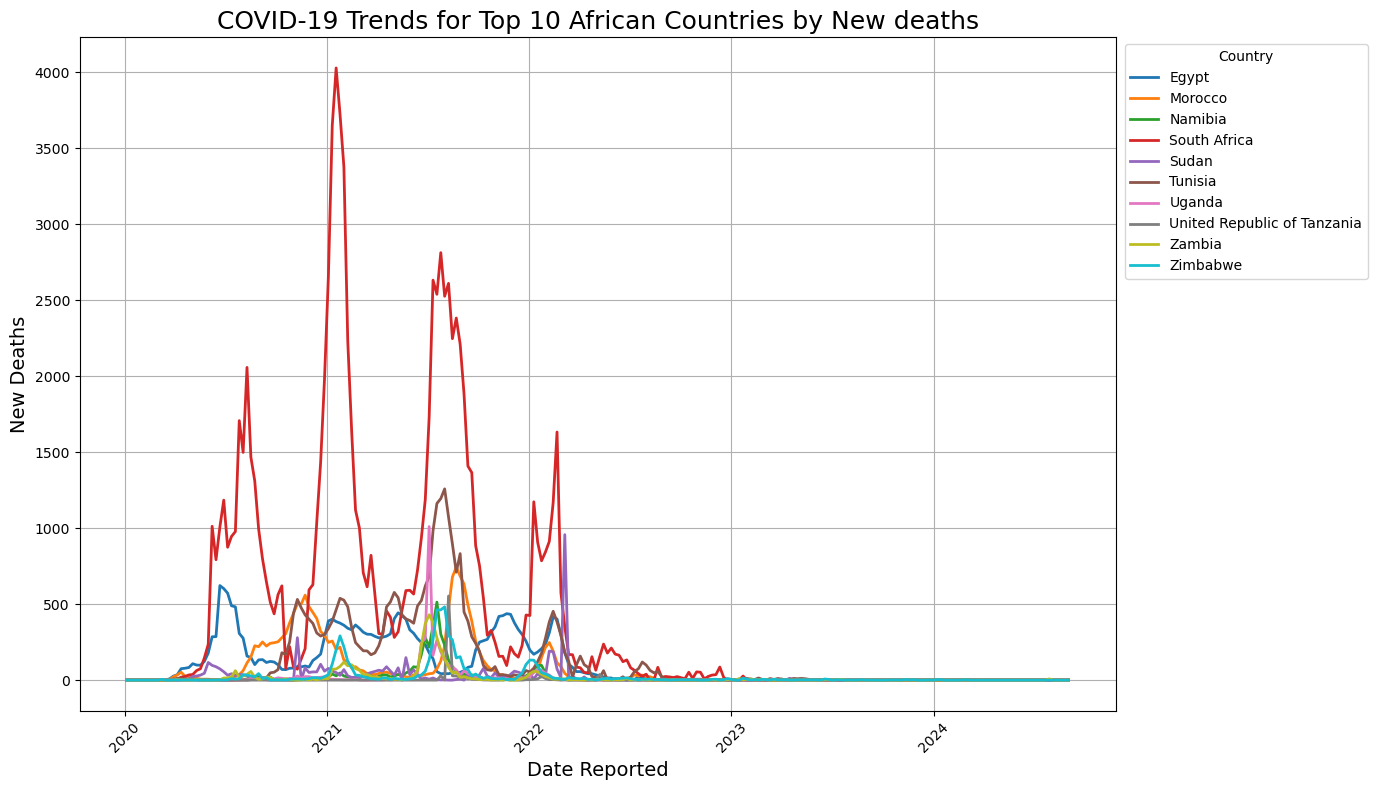

In [45]:


# Filter for African countries
africa_countries = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
    'Chad', 'Comoros', 'Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana',
    'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
    'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles',
    'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Togo', 'Tunisia', 'Uganda', 'United Republic of Tanzania',
    'Zambia', 'Zimbabwe'
]

africa_data = covid[covid['Country'].isin(africa_countries)]

# Calculate total cases for each country
total_cases = africa_data.groupby('Country')['New_deaths'].max().reset_index()
top_10_countries = total_cases.nlargest(10, 'New_deaths')['Country']

# Filter data for the top 10 countries
top_10_data = africa_data[africa_data['Country'].isin(top_10_countries)]

# Aggregate data by country and date
country_trends = top_10_data.groupby(['Date_reported', 'Country'])['New_deaths'].sum().reset_index()

# Plotting top 10 African countries
plt.figure(figsize=(14, 8))
sns.lineplot(data=country_trends, x='Date_reported', y='New_deaths', hue='Country', linewidth=2)

# Customize the plot
plt.title('COVID-19 Trends for Top 10 African Countries by New deaths', fontsize=18)
plt.xlabel('Date Reported', fontsize=14)
plt.ylabel('New Deaths', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Country', fontsize=10)
plt.tight_layout()

plt.show()

MORTALITY ANALYSIS
DEATH TO CASE RATIO(CASE FATALITY RATE) BY COUNTRY

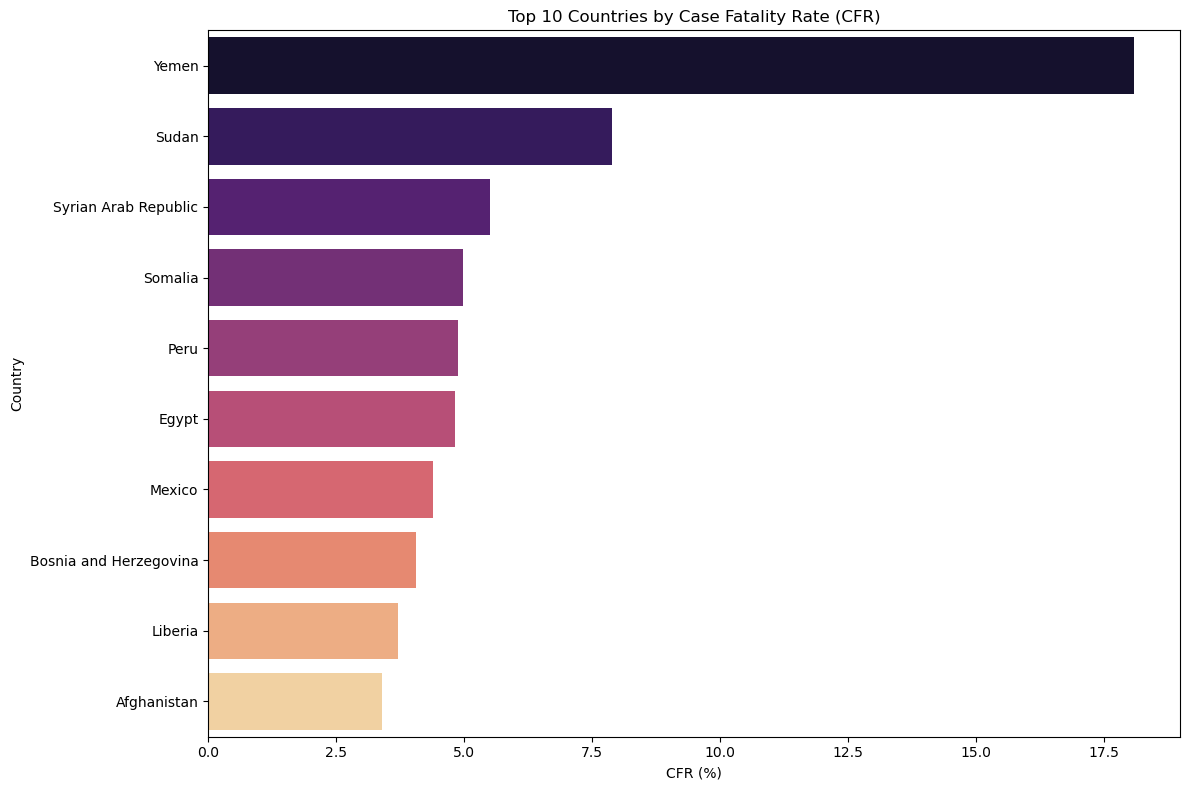

In [54]:
# Calculate the latest cumulative cases and deaths for each country
latest_data = covid.groupby('Country').last().reset_index()

# Calculate Case Fatality Rate (CFR)
latest_data['CFR (%)'] = (latest_data['Cumulative_deaths'] / latest_data['Cumulative_cases']) * 100

# Filter out countries with zero cases to avoid division by zero
latest_data = latest_data[latest_data['Cumulative_cases'] > 0]

# Sort the data by CFR
latest_data = latest_data.sort_values(by='CFR (%)', ascending=False)

# Plotting the top 10 countries with the highest CFR
plt.figure(figsize=(12, 8))
sns.barplot(x='CFR (%)', y='Country', data=latest_data.head(10), palette='magma', hue='Country')

# Customize the plot
plt.title('Top 10 Countries by Case Fatality Rate (CFR)')
plt.xlabel('CFR (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


SUMMARY
1. Performed a data analysis on WHO COVID-19 Cases dataset containing 58560 rows and 9 columns. 
2. Verified data integrity by checking for missing values, duplicate values, date reported to a consistent format.
3. Global Trends: line plot was used to illustrate the trends over time for new cases, new deaths as well as cumulative cases and deaths. The year 2023 was reported as the year with the highest new cases of covid-19 globally while 2021 was reported to have a significant peak for new deaths. The perid of cumulative cases and deaths highlights the substantial global burden of the pandemic.
4. Regional Analysis: barplot was used for comparison of the various WHO Region affected by covid-19, with varying peaks in different regions. Some regions, such as Western Pacific Region(WPRO), South-East Asia Region(SEARO) experienced significant rise, while others like the African Region(AFRO) had relatively smaller peak. The steady rise in cumulative cases and deaths highlights the long term impact of each region. Regions like the South-East Asia Region(SEARO) and European Region(EURO) led in total cases, while others have relatively lower cumulative cases. The South-East Asia(SEARO) and American region(AMRO) had the higest cumulative deaths.
5. Country Specific trends: Different Countries experienced peaks at varying times, reflecting how the pandemic spread globally. Countries in Africa such as South Africa had the highest covid-19 new cases in 2022 while 2021 was reported as the date with the highest deaths.
6. Mortality Analysis: A barplot was used to visualize the top 10 countries with the highest case fatality rate. Each country was calculated using the cumulative cases and cumulative deaths. Each bar represents the percentage of deaths relative to the number of confirmed cases in these countries. Yemen had the highest case fatality rate.



CONCLUSION
The notebook provides a comprehensive view of the progression of COVID-19 Cases and deaths over time globally. The visualizations aid in understanding the pandemic's impact and how it evolved. These insights are cruial for public health planning and response strategies. further analysis involve breaking down the data by regions and countries to understand loclized trends and responses. 
